In [1]:
import numpy as np
import pandas as pd

feature_o=pd.read_csv('./tmp/cafe_features_500m.csv')
feature_o['zone']=feature_o['addr'].copy()
feature_o['zone']=feature_o['zone'].str.split('區',expand=True).drop([1,2], axis=1)
feature = feature_o.loc[:,'density_2021':'train'].fillna(0)
feature

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
0,30537.582094,-1.038945,3844691,7,3.0,3.0,3.0,3.0,1.0,85.0,1.0,18.0,34.0,1.0,31.0,0.0
1,34199.348503,-1.879027,1857272,8,2.0,7.0,3.0,2.0,1.0,122.0,2.0,21.0,30.0,1.0,26.0,0.0
2,16690.778379,-0.500099,2769267,5,4.0,8.0,2.0,3.0,2.0,9.0,3.0,18.0,24.0,1.0,34.0,0.0
3,30029.689819,-0.402234,2750941,7,8.0,6.0,2.0,1.0,2.0,75.0,3.0,24.0,21.0,1.0,56.0,0.0
4,37267.488548,-1.043902,1839588,5,2.0,4.0,2.0,4.0,1.0,52.0,0.0,24.0,26.0,1.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,33846.823431,-0.448332,904809,1,6.0,9.0,2.0,6.0,0.0,202.0,3.0,21.0,4.0,0.0,3.0,0.0
669,15354.918545,-0.271195,2131815,2,7.0,2.0,0.0,4.0,0.0,76.0,2.0,12.0,2.0,0.0,1.0,0.0
670,4921.167930,-2.656622,77812,2,3.0,2.0,0.0,1.0,0.0,155.0,2.0,3.0,1.0,0.0,2.0,0.0
671,6298.055230,7.973902,991876,1,0.0,2.0,0.0,0.0,0.0,15.0,0.0,4.0,0.0,0.0,0.0,0.0


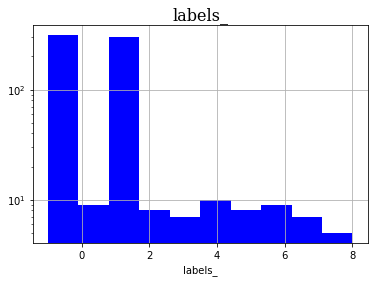

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pickle
from joblib import dump, load

scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=1, metric='l1', min_samples=7).fit(X)

# 存模型
clf = pickle.dumps(clustering)

dump(clf, 'MinMaxnearby500m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

set(clustering.labels_)

In [3]:
feature_o['labels'] = list(clustering.labels_)

In [4]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,7,3.0,3.0,...,1.0,85.0,1.0,18.0,34.0,1.0,31.0,0.0,台北市敦化南路二段5號,0
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,8,2.0,7.0,...,1.0,122.0,2.0,21.0,30.0,1.0,26.0,0.0,台北市中山,0
83,louisa,台北市松江路313巷22號之2,25.061702,121.534769,33570.083333,-1.308009,2988501,8,1.0,5.0,...,1.0,103.0,1.0,25.0,30.0,0.0,17.0,0.0,台北市松江路313巷22號之2,0
107,louisa,台北市中山區民生東路二段150號,25.057821,121.532445,30029.689819,-0.402234,2750941,8,2.0,7.0,...,1.0,112.0,2.0,20.0,32.0,1.0,28.0,0.0,台北市中山,0
186,louisa,台北市大安區仁愛路四段122巷4號,25.036949,121.550222,36504.079884,-0.997182,4242354,8,0.0,3.0,...,0.0,93.0,1.0,22.0,28.0,1.0,38.0,0.0,台北市大安,0
363,stbks,台北市中山區松江路210號,25.057748,121.532909,30029.689819,-0.402234,2750941,8,2.0,7.0,...,1.0,122.0,2.0,20.0,34.0,1.0,27.0,0.0,台北市中山,0
367,stbks,台北市中山區松江路239號1樓,25.059197,121.533455,33570.083333,-1.308009,2988501,7,1.0,3.0,...,1.0,139.0,1.0,20.0,25.0,1.0,23.0,0.0,台北市中山,0
454,stbks,台北市大安區敦化南路二段59號1樓(近敦化南路信義路口),25.031196,121.549194,30537.582094,-1.038945,3844691,6,6.0,5.0,...,1.0,94.0,1.0,21.0,28.0,1.0,35.0,0.0,台北市大安,0
459,stbks,台北市大安區敦化南路二段101號,25.028753,121.549183,30537.582094,-1.038945,3844691,7,6.0,3.0,...,0.0,90.0,0.0,20.0,30.0,1.0,31.0,0.0,台北市大安,0


In [5]:
df_0 = feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']

df_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,32168.413442,-1.045948,3.234731e+06,7.444444,2.555556,4.777778,2.666667,2.888889,0.777778,106.666667,1.222222,20.777778,30.111111,0.888889,28.444444,0.0
std,2344.652635,0.455883,7.597874e+05,0.726483,2.127858,1.855921,0.500000,1.269296,0.440959,18.207141,0.666667,1.922094,2.934469,0.333333,6.287112,0.0
min,30029.689819,-1.879027,1.857272e+06,6.000000,0.000000,3.000000,2.000000,2.000000,0.000000,85.000000,0.000000,18.000000,25.000000,0.000000,17.000000,0.0
25%,30537.582094,-1.308009,2.750941e+06,7.000000,1.000000,3.000000,2.000000,2.000000,1.000000,93.000000,1.000000,20.000000,28.000000,1.000000,26.000000,0.0
50%,30537.582094,-1.038945,2.988501e+06,8.000000,2.000000,5.000000,3.000000,2.000000,1.000000,103.000000,1.000000,20.000000,30.000000,1.000000,28.000000,0.0
75%,33570.083333,-0.997182,3.844691e+06,8.000000,3.000000,7.000000,3.000000,3.000000,1.000000,122.000000,2.000000,21.000000,32.000000,1.000000,31.000000,0.0
max,36504.079884,-0.402234,4.242354e+06,8.000000,6.000000,7.000000,3.000000,5.000000,1.000000,139.000000,2.000000,25.000000,34.000000,1.000000,38.000000,0.0


In [6]:
df_0.median()

density_2021      3.053758e+04
ave_pop_growth   -1.038945e+00
2019_income       2.988501e+06
chain_cafe        8.000000e+00
breakfast         2.000000e+00
beverage          5.000000e+00
fastfood          3.000000e+00
supermarket       2.000000e+00
MRT               1.000000e+00
bus_stop          1.030000e+02
parking_space     1.000000e+00
CVS               2.000000e+01
cafe              3.000000e+01
school            1.000000e+00
bank              2.800000e+01
train             0.000000e+00
dtype: float64

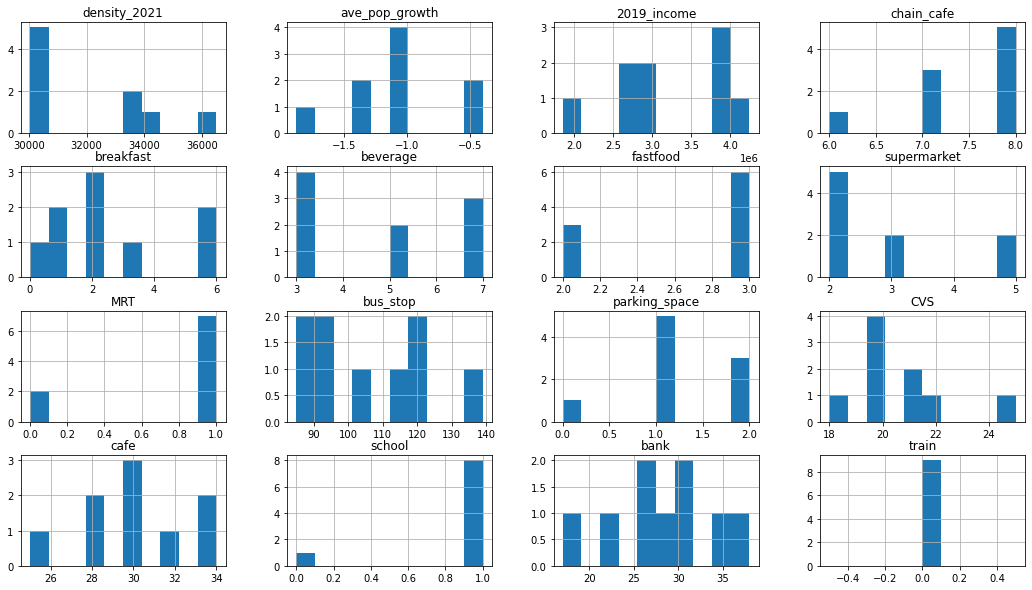

In [7]:
df_0.hist(figsize=(18, 10));

# 大部分人口密度(30537.58)
# 人口大多緩步負成長(-1.038945)
# 年收均值(2988501)
# 平均有(8)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(5)
# 速食餐廳(3)
# 超市(2)
# 捷運(1)
# 停車場(1)
# CVS(2)
# cafe(3)
# school(1)
# 銀行(28)
# 火車站(0)
# 巴士站至少(103)站

In [8]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,7,8.0,6.0,...,2.0,75.0,3.0,24.0,21.0,1.0,56.0,0.0,台北市中山,-1
6,cama,台北市中山區民生東路一段2號,25.057835,121.523249,40836.413198,-0.122100,2793229,7,3.0,8.0,...,1.0,67.0,5.0,40.0,40.0,1.0,27.0,0.0,台北市中山,-1
7,cama,台北市中山區長安東路一段19號,25.049633,121.522983,24953.495137,-0.808010,1859218,4,1.0,4.0,...,2.0,3.0,6.0,22.0,42.0,0.0,18.0,0.0,台北市中山,-1
8,cama,台北市中山區民權西路73號,25.063037,121.519885,20744.096374,-0.599016,2900878,6,2.0,7.0,...,2.0,81.0,1.0,20.0,20.0,3.0,20.0,0.0,台北市中山,-1
9,cama,台北市中山區中山北路三段25之10號,25.065187,121.522484,49924.217762,-0.584791,2439490,7,0.0,5.0,...,3.0,63.0,1.0,26.0,23.0,2.0,23.0,0.0,台北市中山,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,85 cafe,新北市淡水區中山北路一段149巷15號,25.177600,121.442849,31200.839681,-1.180762,883952,1,4.0,3.0,...,0.0,518.0,2.0,14.0,4.0,0.0,3.0,0.0,新北市淡水,-1
664,85 cafe,新北市瑞芳區明燈路三段35號,25.107800,121.807171,21939.680212,-1.170827,494705,2,1.0,3.0,...,0.0,159.0,7.0,6.0,0.0,1.0,2.0,1.0,新北市瑞芳,-1
666,85 cafe,新北市蘆洲區復興路21號,25.087335,121.475661,52188.165157,-0.686037,761042,3,9.0,8.0,...,1.0,222.0,8.0,17.0,4.0,1.0,7.0,0.0,新北市蘆洲,-1
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,6.0,9.0,...,0.0,202.0,3.0,21.0,4.0,0.0,3.0,0.0,新北市蘆洲,-1


In [9]:
df_i1 = feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
df_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,310.000000,310.000000,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,32335.372698,-0.423955,2.342864e+06,5.554839,5.374194,5.235484,2.774194,3.051613,0.935484,151.361290,3.493548,18.690323,14.229032,0.716129,17.670968,0.109677
std,19288.195013,2.081641,1.760129e+06,2.817288,3.911064,2.797253,2.274236,2.267809,0.848966,131.167172,2.649716,8.140011,13.307751,0.777972,14.826334,0.312992
min,1318.101678,-12.785775,8.480800e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,17815.597672,-1.332341,1.148119e+06,4.000000,2.000000,3.000000,1.000000,1.000000,0.000000,37.250000,1.000000,13.000000,4.000000,0.000000,6.250000,0.000000
50%,30986.774138,-0.687174,1.812538e+06,5.000000,5.000000,5.000000,2.000000,3.000000,1.000000,113.500000,3.000000,17.000000,11.000000,1.000000,13.000000,0.000000
75%,45545.909849,-0.006727,2.911446e+06,7.000000,8.000000,7.000000,4.000000,5.000000,1.000000,251.250000,5.000000,22.750000,23.000000,1.000000,24.000000,0.000000
max,95907.282896,12.415476,1.057882e+07,18.000000,18.000000,13.000000,15.000000,12.000000,4.000000,518.000000,12.000000,50.000000,75.000000,5.000000,65.000000,1.000000


In [10]:
df_i1.median()

density_2021      3.098677e+04
ave_pop_growth   -6.871739e-01
2019_income       1.812538e+06
chain_cafe        5.000000e+00
breakfast         5.000000e+00
beverage          5.000000e+00
fastfood          2.000000e+00
supermarket       3.000000e+00
MRT               1.000000e+00
bus_stop          1.135000e+02
parking_space     3.000000e+00
CVS               1.700000e+01
cafe              1.100000e+01
school            1.000000e+00
bank              1.300000e+01
train             0.000000e+00
dtype: float64

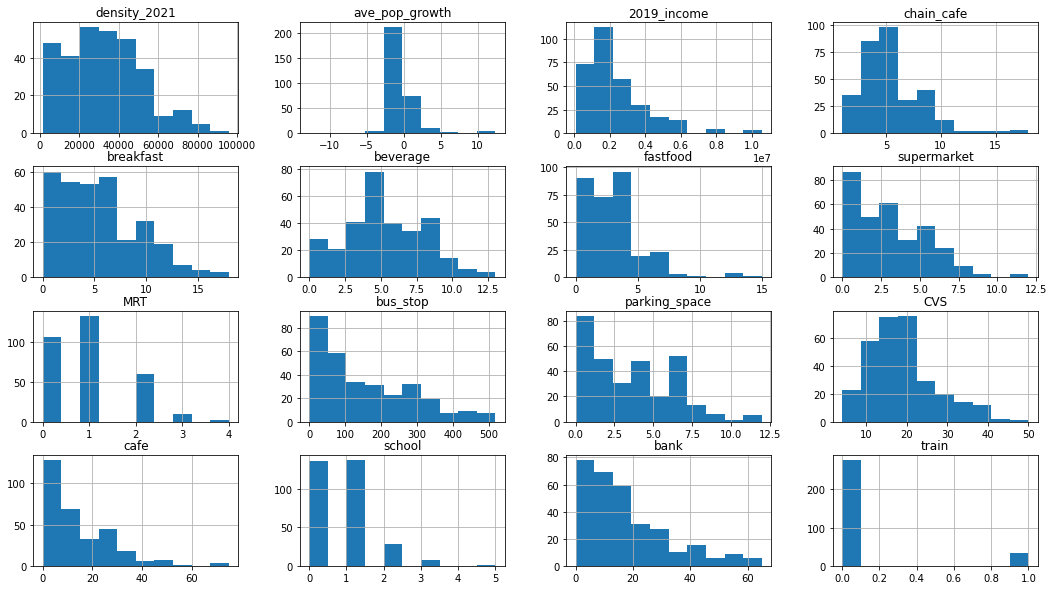

In [11]:
df_i1.hist(figsize=(18, 10));

# 大部分人口密度(30986.77)
# 人口大多緩步負成長(-0.6871739)
# 年收均值(1812538)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(5)
# 飲料店(5)
# 速食餐廳(2)
# 超市(3)
# 捷運(1)
# 停車場(3)
# CVS(17)
# cafe(11)
# school(1)
# 銀行(13)
# 火車站(0)
# 巴士站至少(113.5)站

In [12]:
df_1 = feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']

In [13]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,5,4.0,8.0,...,2.0,9.0,3.0,18.0,24.0,1.0,34.0,0.0,台北市中山,1
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,5,2.0,4.0,...,1.0,52.0,0.0,24.0,26.0,1.0,10.0,0.0,台北市中山,1
5,cama,台北市中山區南京東路三段82號,25.051750,121.539348,21085.129310,0.000600,3990206,8,2.0,6.0,...,2.0,42.0,5.0,21.0,31.0,1.0,34.0,0.0,台北市中山,1
11,cama,台北市中正區新生南路一段90號,25.040386,121.532560,26122.241810,-2.378910,2834326,5,1.0,5.0,...,2.0,11.0,4.0,15.0,19.0,1.0,20.0,0.0,台北市中正,1
12,cama,台北市中正區廣州街10號,25.035506,121.508167,8880.961197,-0.698779,1801442,4,2.0,1.0,...,1.0,96.0,0.0,7.0,10.0,0.0,5.0,0.0,台北市中正,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,85 cafe,新北市萬里區港東路65-1號,25.204034,121.687852,620.705292,-1.277785,460753,1,0.0,1.0,...,0.0,44.0,0.0,3.0,1.0,0.0,0.0,0.0,新北市萬里,1
667,85 cafe,新北市蘆洲區長安街225號1樓,25.082557,121.459412,60483.650968,-0.514861,975373,2,4.0,5.0,...,0.0,148.0,9.0,15.0,4.0,0.0,4.0,0.0,新北市蘆洲,1
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,2,7.0,2.0,...,0.0,76.0,2.0,12.0,2.0,0.0,1.0,0.0,新北市蘆洲,1
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,2,3.0,2.0,...,0.0,155.0,2.0,3.0,1.0,0.0,2.0,0.0,新北市金山,1


In [14]:
df_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,28609.679848,-0.467699,2.352148e+06,3.493333,3.170000,3.336667,1.586667,2.583333,0.473333,83.366667,2.713333,12.563333,6.910000,0.420000,8.090000,0.0
std,19574.405768,1.977485,1.213185e+06,1.815012,2.676749,2.216536,1.265369,1.887219,0.614177,81.153549,1.972509,5.543322,7.805017,0.575649,7.898302,0.0
min,620.705292,-4.059160,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,12540.084313,-1.415509,1.424053e+06,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,8.000000,1.000000,8.000000,1.000000,0.000000,2.750000,0.0
50%,26488.787439,-0.878977,2.273886e+06,3.000000,2.000000,3.000000,2.000000,2.500000,0.000000,61.000000,2.000000,12.000000,4.000000,0.000000,6.000000,0.0
75%,40235.344722,-0.128514,2.876145e+06,5.000000,5.000000,5.000000,2.000000,4.000000,1.000000,145.000000,4.000000,16.000000,10.250000,1.000000,12.000000,0.0
max,110994.346742,9.949524,7.588398e+06,9.000000,16.000000,9.000000,6.000000,9.000000,2.000000,376.000000,10.000000,30.000000,34.000000,2.000000,50.000000,0.0


In [15]:
df_1.median()

density_2021      2.648879e+04
ave_pop_growth   -8.789775e-01
2019_income       2.273886e+06
chain_cafe        3.000000e+00
breakfast         2.000000e+00
beverage          3.000000e+00
fastfood          2.000000e+00
supermarket       2.500000e+00
MRT               0.000000e+00
bus_stop          6.100000e+01
parking_space     2.000000e+00
CVS               1.200000e+01
cafe              4.000000e+00
school            0.000000e+00
bank              6.000000e+00
train             0.000000e+00
dtype: float64

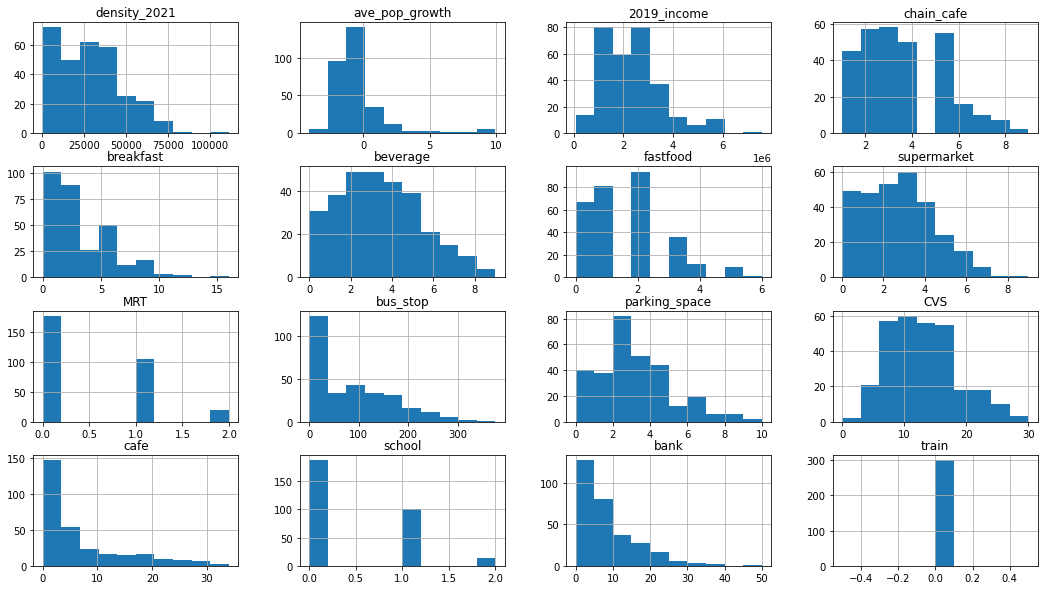

In [16]:
df_1.hist(figsize=(18, 10));

# 大部分人口密度(26488.79)
# 人口大多緩步負成長(-0.8789775)
# 年收均值(2273886)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(3)
# 速食餐廳(2)
# 超市(2.5)
# 捷運(0)
# 停車場(2)
# CVS(12)
# cafe(4)
# school(0)
# 銀行(6)
# 火車站(0)
# 巴士站至少(61)站

In [17]:
df_2 = feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']

In [18]:
df_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.0
mean,18150.199873,-1.786675,2.222120e+06,10.250000,4.125000,3.875000,2.625000,1.125000,1.0,58.500000,3.25000,18.250000,20.125000,0.875000,46.875000,0.0
std,5863.985137,0.476201,2.951231e+05,0.707107,1.642081,0.834523,0.744024,0.353553,0.0,16.115653,0.46291,1.488048,2.997022,0.353553,3.482097,0.0
min,11068.765052,-2.131716,1.865725e+06,9.000000,1.000000,3.000000,2.000000,1.000000,1.0,40.000000,3.00000,15.000000,15.000000,0.000000,41.000000,0.0
25%,11068.765052,-2.131716,1.865725e+06,10.000000,4.250000,3.000000,2.000000,1.000000,1.0,47.750000,3.00000,18.500000,17.750000,1.000000,45.000000,0.0
50%,22399.060766,-2.131716,2.435957e+06,10.000000,5.000000,4.000000,2.500000,1.000000,1.0,55.000000,3.00000,19.000000,22.000000,1.000000,46.500000,0.0
75%,22399.060766,-1.211607,2.435957e+06,11.000000,5.000000,4.250000,3.000000,1.000000,1.0,70.000000,3.25000,19.000000,22.000000,1.000000,49.500000,0.0
max,22399.060766,-1.211607,2.435957e+06,11.000000,5.000000,5.000000,4.000000,2.000000,1.0,85.000000,4.00000,19.000000,23.000000,1.000000,51.000000,0.0


In [19]:
df_2.median()

density_2021      2.239906e+04
ave_pop_growth   -2.131716e+00
2019_income       2.435957e+06
chain_cafe        1.000000e+01
breakfast         5.000000e+00
beverage          4.000000e+00
fastfood          2.500000e+00
supermarket       1.000000e+00
MRT               1.000000e+00
bus_stop          5.500000e+01
parking_space     3.000000e+00
CVS               1.900000e+01
cafe              2.200000e+01
school            1.000000e+00
bank              4.650000e+01
train             0.000000e+00
dtype: float64

In [20]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
21,cama,台北市信義區基隆路一段167號,25.041675,121.565175,22399.060766,-2.131716,2435957,9,5.0,5.0,...,1.0,40.0,3.0,19.0,23.0,1.0,41.0,0.0,台北市信義,2
22,cama,台北市信義區松仁路32-36號,25.038786,121.568119,11068.765052,-1.211607,1865725,11,1.0,3.0,...,1.0,69.0,3.0,15.0,15.0,1.0,49.0,0.0,台北市信義,2
23,cama,台北市信義區松高路12號B2,25.038813,121.566800,11068.765052,-1.211607,1865725,10,5.0,3.0,...,1.0,73.0,3.0,19.0,17.0,0.0,51.0,0.0,台北市信義,2
129,louisa,台北市信義區忠孝東路五段33號,25.041308,121.565943,22399.060766,-2.131716,2435957,11,5.0,5.0,...,1.0,41.0,3.0,19.0,22.0,1.0,45.0,0.0,台北市信義,2
391,stbks,台北市信義區忠孝東路五段8號2F,25.040865,121.565417,22399.060766,-2.131716,2435957,10,5.0,4.0,...,1.0,50.0,3.0,19.0,22.0,1.0,45.0,0.0,台北市信義,2
392,stbks,台北市信義區松仁路28號B1,25.039511,121.568124,22399.060766,-2.131716,2435957,10,2.0,4.0,...,1.0,60.0,4.0,17.0,18.0,1.0,51.0,0.0,台北市信義,2
395,stbks,台北市信義區松高路11號1樓,25.039515,121.565242,11068.765052,-1.211607,1865725,11,5.0,3.0,...,1.0,85.0,4.0,19.0,22.0,1.0,48.0,0.0,台北市信義,2
397,stbks,台北市信義區忠孝東路5段8號B2,25.040865,121.565417,22399.060766,-2.131716,2435957,10,5.0,4.0,...,1.0,50.0,3.0,19.0,22.0,1.0,45.0,0.0,台北市信義,2


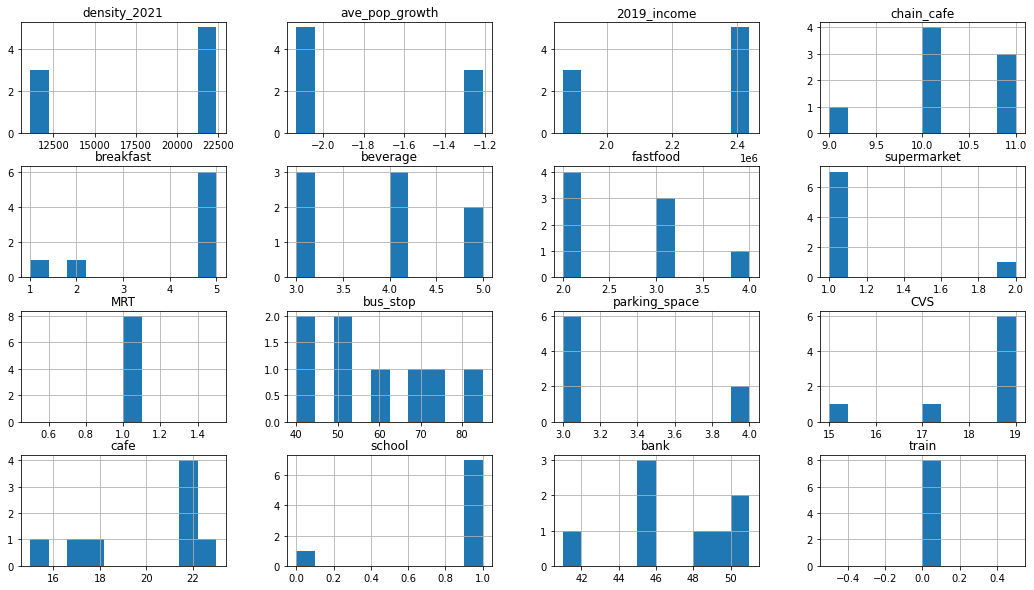

In [21]:
df_2.hist(figsize=(18, 10));

# 大部分人口密度(22399.06)
# 人口大多緩步負成長(-2.131716)
# 年收均值(2435957)
# 平均有(10)間小型咖啡廳
# 沒有早餐店(5)
# 飲料店(4)
# 速食餐廳(2.5)
# 超市(1)
# 捷運(1)
# 停車場(3)
# CVS(19)
# cafe(22)
# school(1)
# 銀行(46.5)
# 火車站(0)
# 巴士站至少(55)站

In [22]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
34,cama,台北市南港區南港路二段6號,25.054352,121.605988,18109.993504,5.352986,2265416,7,1.0,2.0,...,1.0,53.0,1.0,8.0,4.0,1.0,4.0,1.0,台北市南港,3
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,49.0,1.0,8.0,3.0,1.0,2.0,1.0,台北市南港,3
156,louisa,台北市南港區興華路28號,25.054943,121.605915,18109.993504,5.352986,2265416,7,1.0,2.0,...,1.0,57.0,1.0,9.0,4.0,2.0,4.0,1.0,台北市南港,3
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,49.0,1.0,8.0,3.0,1.0,2.0,1.0,台北市南港,3
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,49.0,1.0,8.0,3.0,1.0,2.0,1.0,台北市南港,3
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,49.0,1.0,8.0,3.0,1.0,2.0,1.0,台北市南港,3
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,40.0,1.0,8.0,4.0,1.0,2.0,1.0,台北市南港,3


In [23]:
df_3 = feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']

In [24]:
df_3.median()

density_2021        2156.336462
ave_pop_growth        -2.364998
2019_income       992878.000000
chain_cafe             7.000000
breakfast              1.000000
beverage               2.000000
fastfood               2.000000
supermarket            1.000000
MRT                    1.000000
bus_stop              49.000000
parking_space          1.000000
CVS                    8.000000
cafe                   3.000000
school                 1.000000
bank                   2.000000
train                  1.000000
dtype: float64

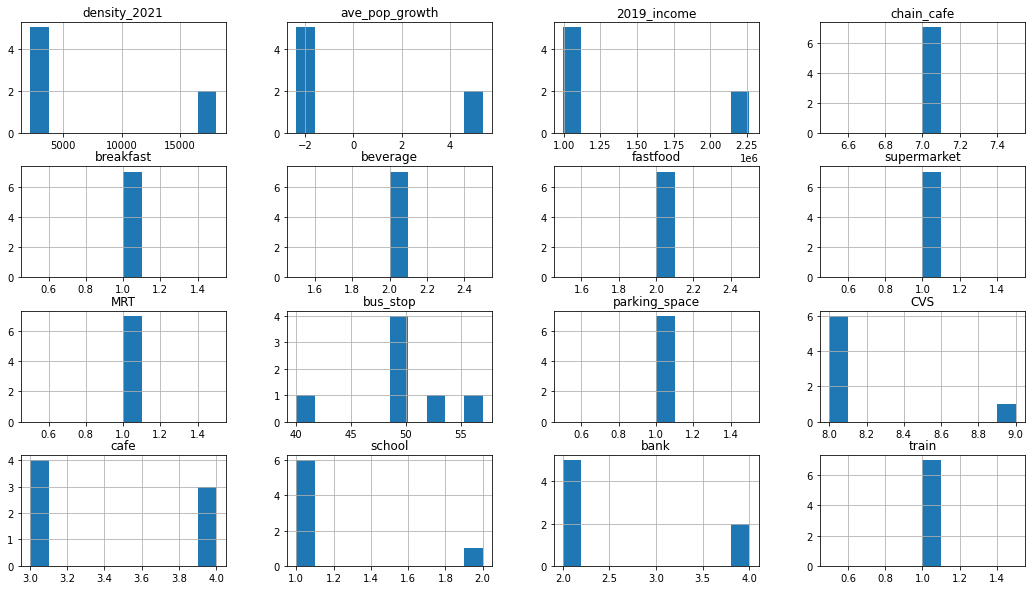

In [25]:
df_3.hist(figsize=(18, 10));

# 大部分人口密度(2156.336462)
# 人口大多緩步負成長(-2.364998)
# 年收均值(992878)
# 平均有(7)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(2)
# 速食餐廳(2)
# 超市(1)
# 捷運(1)
# 停車場(1)
# CVS(8)
# cafe(3)
# school(1)
# 銀行(2)
# 火車站(1)
# 巴士站至少(49)站

In [26]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
117,louisa,台北市中正區信陽街5號之2,25.044699,121.516700,5734.296784,0.58577,1631191,17,1.0,8.0,...,3.0,144.0,2.0,42.0,13.0,1.0,41.0,1.0,台北市中正,4
121,louisa,台北市中正區忠孝西路一段38號B1-B櫃,25.046215,121.516436,5734.296784,0.58577,1631191,17,1.0,10.0,...,2.0,114.0,3.0,45.0,20.0,0.0,40.0,1.0,台北市中正,4
125,louisa,台北市中正區忠孝西路一段50號1樓,25.046303,121.515823,5734.296784,0.58577,1631191,18,1.0,11.0,...,2.0,126.0,2.0,46.0,22.0,0.0,46.0,1.0,台北市中正,4
371,stbks,台北市中正區忠孝西路一段49號B1,25.047066,121.517670,5734.296784,0.58577,1631191,15,1.0,10.0,...,2.0,75.0,5.0,38.0,27.0,0.0,30.0,1.0,台北市中正,4
373,stbks,台北市中正區南陽街1號2F,25.045715,121.516229,5734.296784,0.58577,1631191,18,1.0,9.0,...,3.0,139.0,2.0,44.0,17.0,0.0,41.0,1.0,台北市中正,4
378,stbks,台北市中正區青島西路7號一樓,25.044913,121.518182,5734.296784,0.58577,1631191,16,1.0,7.0,...,3.0,112.0,3.0,38.0,12.0,0.0,24.0,1.0,台北市中正,4
379,stbks,台北市中正區鄭州路8號B1,25.048788,121.514536,5734.296784,0.58577,1631191,15,2.0,10.0,...,3.0,110.0,2.0,40.0,28.0,0.0,45.0,1.0,台北市中正,4
380,stbks,台北市中正區北平西路3號2樓,25.047176,121.517058,5734.296784,0.58577,1631191,16,1.0,10.0,...,2.0,98.0,5.0,41.0,24.0,0.0,38.0,1.0,台北市中正,4
382,stbks,台北市中正區館前路26號1樓,25.044879,121.514906,5734.296784,0.58577,1631191,17,2.0,10.0,...,3.0,191.0,1.0,49.0,19.0,1.0,56.0,1.0,台北市中正,4
384,stbks,台北市中正區忠孝西路一段47號B1,25.046880,121.516761,5734.296784,0.58577,1631191,17,1.0,10.0,...,2.0,113.0,4.0,44.0,21.0,0.0,41.0,1.0,台北市中正,4


In [27]:
df_4 = feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']

In [28]:
df_4.median()

density_2021      5.734297e+03
ave_pop_growth    5.857702e-01
2019_income       1.631191e+06
chain_cafe        1.700000e+01
breakfast         1.000000e+00
beverage          1.000000e+01
fastfood          1.550000e+01
supermarket       0.000000e+00
MRT               2.500000e+00
bus_stop          1.135000e+02
parking_space     2.500000e+00
CVS               4.300000e+01
cafe              2.050000e+01
school            0.000000e+00
bank              4.100000e+01
train             1.000000e+00
dtype: float64

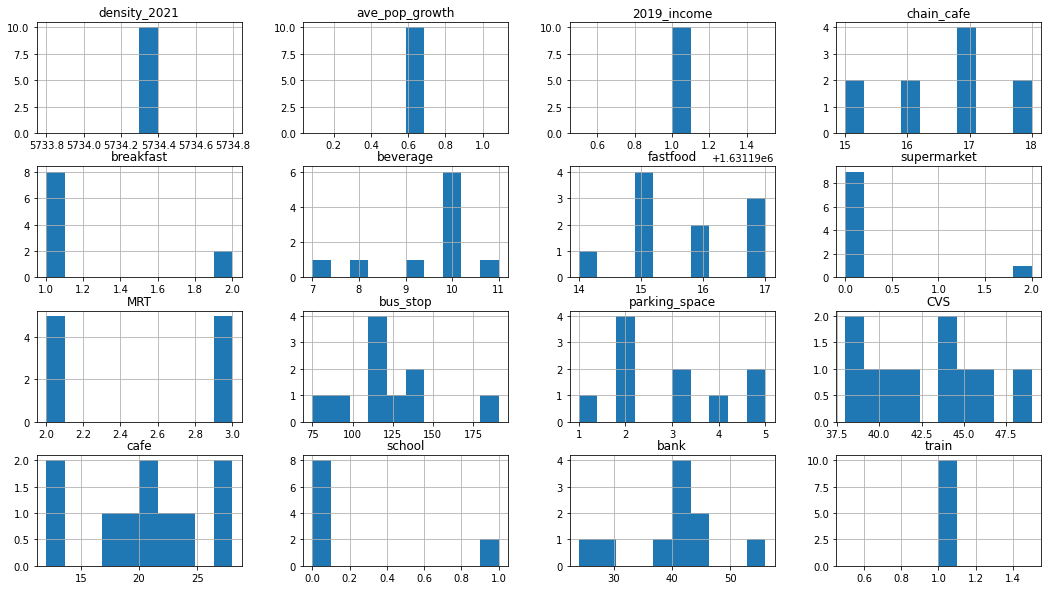

In [29]:
df_4.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口大多緩步負成長(0.5857702)
# 年收均值(1631191)
# 平均有(17)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(10)
# 速食餐廳(15.5)
# 超市(0)
# 捷運(2.5)
# 停車場(2.5)
# CVS(43)
# cafe(20.5)
# school(0)
# 銀行(41)
# 火車站(1)
# 巴士站至少(113.5)站

In [30]:
df_5 = feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
df_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,8587.985403,1.283478,4.847210e+06,8.000000,6.875000,6.500000,3.000000,0.0,2.250000,86.125000,1.875000,13.250000,5.875000,0.375000,17.750000,0.0
std,3214.938817,0.239106,1.069384e+06,0.755929,1.356203,0.534522,0.755929,0.0,0.886405,20.378122,0.353553,0.707107,0.834523,0.517549,1.982062,0.0
min,7451.332884,0.691721,2.200618e+06,7.000000,6.000000,6.000000,2.000000,0.0,1.000000,65.000000,1.000000,12.000000,5.000000,0.000000,13.000000,0.0
25%,7451.332884,1.368015,5.225294e+06,7.750000,6.000000,6.000000,2.750000,0.0,1.750000,68.000000,2.000000,13.000000,5.000000,0.000000,18.000000,0.0
50%,7451.332884,1.368015,5.225294e+06,8.000000,6.500000,6.500000,3.000000,0.0,2.500000,84.000000,2.000000,13.000000,6.000000,0.000000,18.000000,0.0
75%,7451.332884,1.368015,5.225294e+06,8.250000,7.000000,7.000000,3.250000,0.0,3.000000,100.500000,2.000000,14.000000,6.250000,1.000000,19.000000,0.0
max,16544.553039,1.368015,5.225294e+06,9.000000,10.000000,7.000000,4.000000,0.0,3.000000,116.000000,2.000000,14.000000,7.000000,1.000000,19.000000,0.0


In [31]:
feature_o[feature_o['labels'] == 5]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
33,cama,台北市南港區南港路一段153號,25.055077,121.613604,16544.553039,0.691721,2200618,9,7.0,7.0,...,2.0,94.0,2.0,14.0,6.0,0.0,19.0,0.0,台北市南港,5
86,louisa,台北市三重路19-4號1樓,25.056850,121.613612,7451.332884,1.368015,5225294,8,10.0,7.0,...,3.0,108.0,2.0,13.0,7.0,1.0,19.0,0.0,台北市三重路19-4號1樓,5
157,louisa,台北市南港區經貿二路1號1樓商店街106-2,25.056376,121.617345,7451.332884,1.368015,5225294,7,7.0,6.0,...,3.0,116.0,1.0,14.0,7.0,0.0,13.0,0.0,台北市南港,5
158,louisa,台北市南港區經貿二路186號b棟3樓,25.059222,121.615185,7451.332884,1.368015,5225294,8,6.0,6.0,...,3.0,65.0,2.0,13.0,5.0,0.0,18.0,0.0,台北市南港,5
423,stbks,台北市南港區南港路一段114號,25.055444,121.613758,7451.332884,1.368015,5225294,9,7.0,7.0,...,2.0,98.0,2.0,14.0,6.0,0.0,19.0,0.0,台北市南港,5
424,stbks,台北市南港區園區街3號2樓之7,25.058478,121.611987,7451.332884,1.368015,5225294,7,6.0,6.0,...,1.0,69.0,2.0,12.0,5.0,1.0,18.0,0.0,台北市南港,5
425,stbks,台北市南港區三重路19-10號1樓,25.058139,121.613519,7451.332884,1.368015,5225294,8,6.0,7.0,...,1.0,74.0,2.0,13.0,6.0,1.0,18.0,0.0,台北市南港,5
426,stbks,台北市南港區經貿二路186號1樓,25.059222,121.615185,7451.332884,1.368015,5225294,8,6.0,6.0,...,3.0,65.0,2.0,13.0,5.0,0.0,18.0,0.0,台北市南港,5


In [32]:
df_5.median()

density_2021      7.451333e+03
ave_pop_growth    1.368015e+00
2019_income       5.225294e+06
chain_cafe        8.000000e+00
breakfast         6.500000e+00
beverage          6.500000e+00
fastfood          3.000000e+00
supermarket       0.000000e+00
MRT               2.500000e+00
bus_stop          8.400000e+01
parking_space     2.000000e+00
CVS               1.300000e+01
cafe              6.000000e+00
school            0.000000e+00
bank              1.800000e+01
train             0.000000e+00
dtype: float64

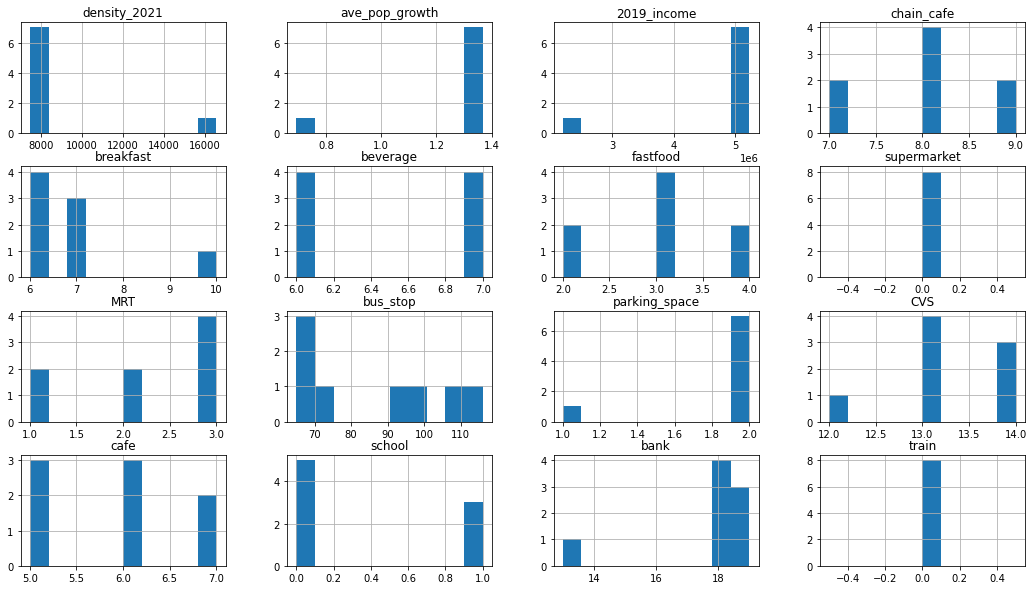

In [33]:
df_5.hist(figsize=(18, 10));

# 大部分人口密度(74513.33)
# 人口大多緩步負成長(1.368015)
# 年收均值(5225294)
# 平均有(8)間小型咖啡廳
# 沒有早餐店(6.5)
# 飲料店(6.5)
# 速食餐廳(3)
# 超市(0)
# 捷運(2.5)
# 停車場(2)
# CVS(13)
# cafe(6)
# school(0)
# 銀行(18)
# 火車站(0)
# 巴士站至少(84)站

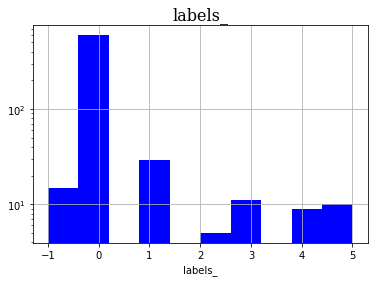

{-1, 0, 1, 2, 3, 4, 5}

In [34]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pickle
from joblib import dump, load

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=3, metric='l2',algorithm='kd_tree', min_samples=4).fit(X)

# 存模型
clf = pickle.dumps(clustering)

dump(clf, 'Zscalenearby500m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()
feature_o['labels'] = list(clustering.labels_)
set(clustering.labels_)

In [35]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
28,cama,台北市內湖區成功路三段174巷18號,25.081133,121.590492,12754.927193,-0.499299,4397179,3,5.0,3.0,...,1.0,1.0,1.0,16.0,4.0,5.0,13.0,0.0,台北市內湖,-1
38,cama,台北市大同區承德路一段30號,25.050647,121.516749,21679.756337,-2.661784,1336075,14,1.0,6.0,...,4.0,70.0,4.0,30.0,45.0,1.0,25.0,1.0,台北市大同,-1
60,cama,新北市新店區北新路二段218號,24.977080,121.543032,43717.885100,-12.785775,1655582,4,9.0,7.0,...,1.0,317.0,6.0,17.0,5.0,2.0,16.0,0.0,新北市新店,-1
98,louisa,台北市中山北路一段140巷138號,25.051451,121.520449,19806.234807,-1.448197,1982235,9,0.0,6.0,...,2.0,19.0,9.0,23.0,69.0,1.0,30.0,1.0,台北市中山北路一段140巷138號,-1
113,louisa,台北市中山區復興南路一段42號,25.045309,121.543651,18172.885686,-2.524799,1403888,12,18.0,7.0,...,2.0,5.0,2.0,24.0,30.0,0.0,23.0,0.0,台北市中山,-1
114,louisa,台北市中山區民權西路3號、5號,25.062974,121.522170,20744.096374,-0.599016,2900878,9,0.0,9.0,...,3.0,91.0,2.0,27.0,20.0,3.0,25.0,0.0,台北市中山,-1
156,louisa,台北市南港區興華路28號,25.054943,121.605915,18109.993504,5.352986,2265416,7,1.0,2.0,...,1.0,57.0,1.0,9.0,4.0,2.0,4.0,1.0,台北市南港,-1
176,louisa,台北市大同區南京西路65號,25.053118,121.518932,43157.003800,-0.956769,1841575,8,0.0,9.0,...,2.0,33.0,7.0,23.0,70.0,1.0,30.0,0.0,台北市大同,-1
177,louisa,台北市大同區華陰街87號,25.049762,121.517740,21679.756337,-2.661784,1336075,14,1.0,7.0,...,4.0,67.0,5.0,33.0,50.0,1.0,25.0,1.0,台北市大同,-1
287,louisa,新北市板橋區文化路二段113號,25.026434,121.469618,26181.105946,-0.619394,1137387,8,12.0,6.0,...,2.0,283.0,11.0,21.0,14.0,0.0,15.0,0.0,新北市板橋,-1


In [36]:
dfz_i1=feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
dfz_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,24770.606741,-1.897098,2.577978e+06,9.933333,3.333333,6.066667,6.666667,2.466667,2.133333,82.800000,4.466667,24.066667,31.933333,1.333333,25.866667,0.400000
std,8781.800247,3.603207,2.070367e+06,4.165619,5.433582,2.433888,3.866831,1.807392,0.990430,93.293087,3.113718,8.639334,24.924075,1.290994,11.076788,0.507093
min,12754.927193,-12.785775,1.137387e+06,3.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000,4.000000,0.000000,4.000000,0.000000
25%,20275.165591,-2.661784,1.336075e+06,8.000000,0.000000,4.000000,4.000000,1.500000,1.500000,26.000000,2.000000,19.000000,12.500000,1.000000,19.500000,0.000000
50%,21679.756337,-1.448197,1.655582e+06,9.000000,1.000000,6.000000,6.000000,2.000000,2.000000,67.000000,4.000000,23.000000,30.000000,1.000000,25.000000,0.000000
75%,27823.839165,-0.780460,2.583147e+06,13.000000,3.000000,8.000000,10.000000,3.500000,2.500000,83.000000,6.500000,29.500000,47.500000,1.500000,31.000000,1.000000
max,43717.885100,5.352986,8.391668e+06,17.000000,18.000000,9.000000,12.000000,6.000000,4.000000,317.000000,11.000000,38.000000,75.000000,5.000000,49.000000,1.000000


In [37]:
dfz_i1.median()

density_2021      2.167976e+04
ave_pop_growth   -1.448197e+00
2019_income       1.655582e+06
chain_cafe        9.000000e+00
breakfast         1.000000e+00
beverage          6.000000e+00
fastfood          6.000000e+00
supermarket       2.000000e+00
MRT               2.000000e+00
bus_stop          6.700000e+01
parking_space     4.000000e+00
CVS               2.300000e+01
cafe              3.000000e+01
school            1.000000e+00
bank              2.500000e+01
train             0.000000e+00
dtype: float64

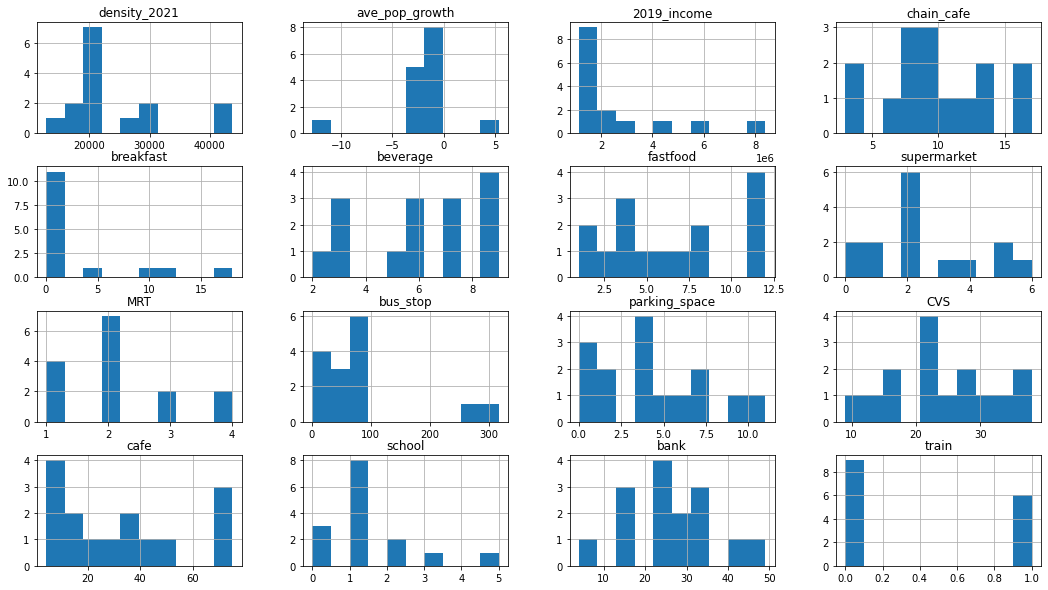

In [38]:
dfz_i1.hist(figsize=(18, 10));

# 大部分人口密度(21679.76)
# 人口大多緩步負成長(-1.448197)
# 年收均值(1655582)
# 平均有(9)間小型咖啡廳
# 早餐店(1)
# 飲料店(6)
# 速食餐廳(6)
# 超市(2)
# 捷運(2)
# 停車場(4)
# CVS(23)
# cafe(3)
# school(1)
# 銀行(25)
# 火車站(0)
# 巴士站至少(67)站

In [39]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,7,3.0,3.0,...,1.0,85.0,1.0,18.0,34.0,1.0,31.0,0.0,台北市敦化南路二段5號,0
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,8,2.0,7.0,...,1.0,122.0,2.0,21.0,30.0,1.0,26.0,0.0,台北市中山,0
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,5,4.0,8.0,...,2.0,9.0,3.0,18.0,24.0,1.0,34.0,0.0,台北市中山,0
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,7,8.0,6.0,...,2.0,75.0,3.0,24.0,21.0,1.0,56.0,0.0,台北市中山,0
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,5,2.0,4.0,...,1.0,52.0,0.0,24.0,26.0,1.0,10.0,0.0,台北市中山,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,85 cafe,新北市蘆洲區長安街225號1樓,25.082557,121.459412,60483.650968,-0.514861,975373,2,4.0,5.0,...,0.0,148.0,9.0,15.0,4.0,0.0,4.0,0.0,新北市蘆洲,0
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,6.0,9.0,...,0.0,202.0,3.0,21.0,4.0,0.0,3.0,0.0,新北市蘆洲,0
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,2,7.0,2.0,...,0.0,76.0,2.0,12.0,2.0,0.0,1.0,0.0,新北市蘆洲,0
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,2,3.0,2.0,...,0.0,155.0,2.0,3.0,1.0,0.0,2.0,0.0,新北市金山,0


In [40]:
dfz_0=feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']
dfz_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,594.000000,594.000000,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.0
mean,30408.443823,-0.457790,2.378092e+06,4.589226,4.304714,4.276094,2.127946,2.792929,0.720539,117.301347,3.038721,15.638047,10.707071,0.582492,13.599327,0.0
std,19573.170081,1.869207,1.413500e+06,2.461772,3.433749,2.624544,1.630380,2.096946,0.754536,114.324831,2.341109,7.289159,10.730725,0.670327,13.299802,0.0
min,620.705292,-7.532965,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,14918.905599,-1.395100,1.259438e+06,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,19.000000,1.000000,10.000000,2.000000,0.000000,4.000000,0.0
50%,29481.820798,-0.812844,2.148822e+06,4.000000,4.000000,4.000000,2.000000,3.000000,1.000000,86.500000,3.000000,15.000000,6.000000,0.000000,9.000000,0.0
75%,42995.381149,-0.023034,3.032742e+06,6.000000,6.000000,6.000000,3.000000,4.000000,1.000000,175.750000,4.000000,20.000000,18.000000,1.000000,19.000000,0.0
max,110994.346742,12.415476,8.391668e+06,16.000000,17.000000,13.000000,9.000000,12.000000,3.000000,518.000000,12.000000,43.000000,57.000000,3.000000,65.000000,0.0


In [41]:
dfz_0.median()

density_2021      2.948182e+04
ave_pop_growth   -8.128442e-01
2019_income       2.148822e+06
chain_cafe        4.000000e+00
breakfast         4.000000e+00
beverage          4.000000e+00
fastfood          2.000000e+00
supermarket       3.000000e+00
MRT               1.000000e+00
bus_stop          8.650000e+01
parking_space     3.000000e+00
CVS               1.500000e+01
cafe              6.000000e+00
school            0.000000e+00
bank              9.000000e+00
train             0.000000e+00
dtype: float64

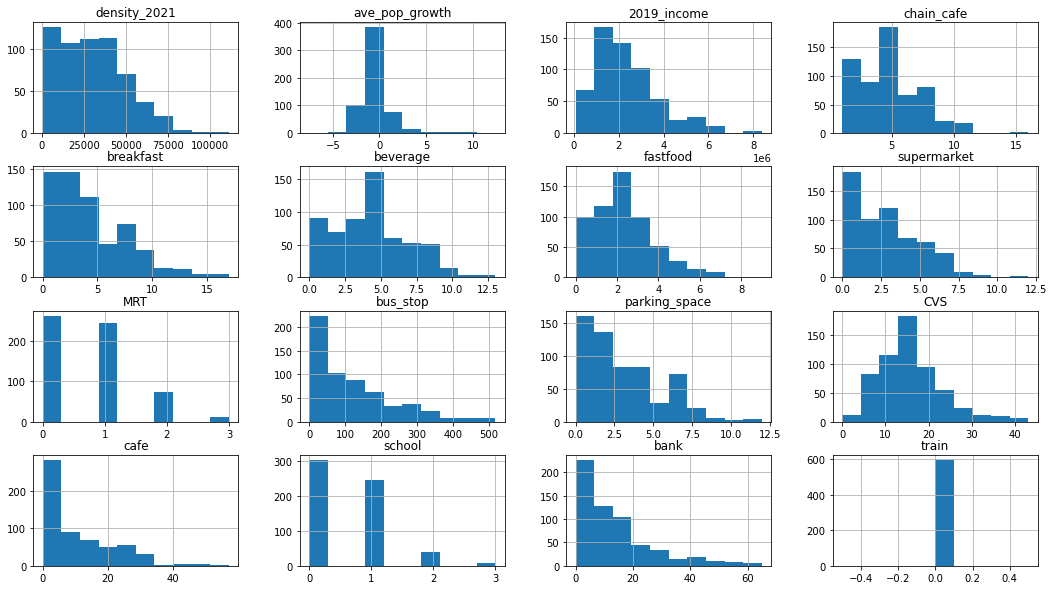

In [42]:
dfz_0.hist(figsize=(18, 10));

# 大部分人口密度(29481.82)
# 人口大多緩步負成長(-0.8128442)
# 年收均值(2148822)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(4)
# 飲料店(4)
# 速食餐廳(2)
# 超市(3)
# 捷運(1)
# 停車場(3)
# CVS(15)
# cafe(6)
# school(0)
# 銀行(9)
# 火車站(0)
# 巴士站至少(86.5)站

In [43]:
dfz_1=feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']
dfz_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,25298.199066,-0.929904,1.202277e+06,4.241379,4.689655,4.793103,1.551724,2.551724,0.482759,117.689655,3.448276,13.000000,4.482759,0.379310,6.689655,1.0
std,18131.856995,1.002757,6.155994e+05,1.902164,3.317739,2.968637,1.088453,1.881986,0.508548,76.656052,1.764455,4.682795,3.180529,0.493804,4.277044,0.0
min,2156.336462,-2.364998,8.480800e+04,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,6.000000,0.000000,0.000000,1.000000,1.0
25%,10140.225365,-1.758407,9.168990e+05,3.000000,1.000000,3.000000,1.000000,1.000000,0.000000,49.000000,2.000000,8.000000,2.000000,0.000000,2.000000,1.0
50%,27650.057475,-0.800880,1.189988e+06,5.000000,6.000000,4.000000,2.000000,2.000000,0.000000,133.000000,4.000000,13.000000,4.000000,0.000000,6.000000,1.0
75%,35662.729822,-0.357518,1.566241e+06,6.000000,7.000000,6.000000,2.000000,4.000000,1.000000,181.000000,4.000000,17.000000,7.000000,1.000000,10.000000,1.0
max,81369.990756,0.830833,2.393420e+06,7.000000,12.000000,12.000000,3.000000,6.000000,1.000000,234.000000,7.000000,21.000000,13.000000,1.000000,16.000000,1.0


In [44]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,49.0,1.0,8.0,3.0,1.0,2.0,1.0,台北市南港,1
55,cama,台北市松山區八德路四段668號,25.049865,121.576162,27650.057475,-0.357518,2393420,6,6.0,6.0,...,1.0,15.0,5.0,20.0,8.0,0.0,9.0,1.0,台北市松山,1
160,louisa,台北市南港區八德路四段786號,25.050500,121.580437,11625.129195,-1.392464,1566241,5,3.0,4.0,...,1.0,15.0,3.0,17.0,7.0,0.0,5.0,1.0,台北市南港,1
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,49.0,1.0,8.0,3.0,1.0,2.0,1.0,台北市南港,1
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,7,1.0,2.0,...,1.0,49.0,1.0,8.0,3.0,1.0,2.0,1.0,台北市南港,1
207,louisa,台北市松山區市民大道六段131號,25.049600,121.578755,27650.057475,-0.357518,2393420,5,6.0,5.0,...,1.0,14.0,4.0,19.0,7.0,0.0,9.0,1.0,台北市松山,1
209,louisa,台北市松山區市民大道六段131號1樓,25.049600,121.578755,27650.057475,-0.357518,2393420,5,6.0,5.0,...,1.0,14.0,4.0,19.0,7.0,0.0,9.0,1.0,台北市松山,1
218,louisa,台北市萬華區和平西路三段143號,25.035423,121.498912,16736.810564,-0.413798,1385419,3,0.0,3.0,...,1.0,181.0,3.0,16.0,6.0,0.0,9.0,1.0,台北市萬華,1
292,louisa,新北市板橋區國光路189-5號,25.018654,121.461442,51697.047004,-0.148735,966821,3,5.0,4.0,...,0.0,170.0,4.0,11.0,8.0,1.0,4.0,1.0,新北市板橋,1
313,louisa,新北市樹林區中山路一段115號,24.990447,121.422935,35662.729822,-0.800880,1579911,5,7.0,11.0,...,0.0,176.0,4.0,16.0,5.0,0.0,11.0,1.0,新北市樹林,1


In [45]:
dfz_1.median()

density_2021      2.765006e+04
ave_pop_growth   -8.008798e-01
2019_income       1.189988e+06
chain_cafe        5.000000e+00
breakfast         6.000000e+00
beverage          4.000000e+00
fastfood          2.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          1.330000e+02
parking_space     4.000000e+00
CVS               1.300000e+01
cafe              4.000000e+00
school            0.000000e+00
bank              6.000000e+00
train             1.000000e+00
dtype: float64

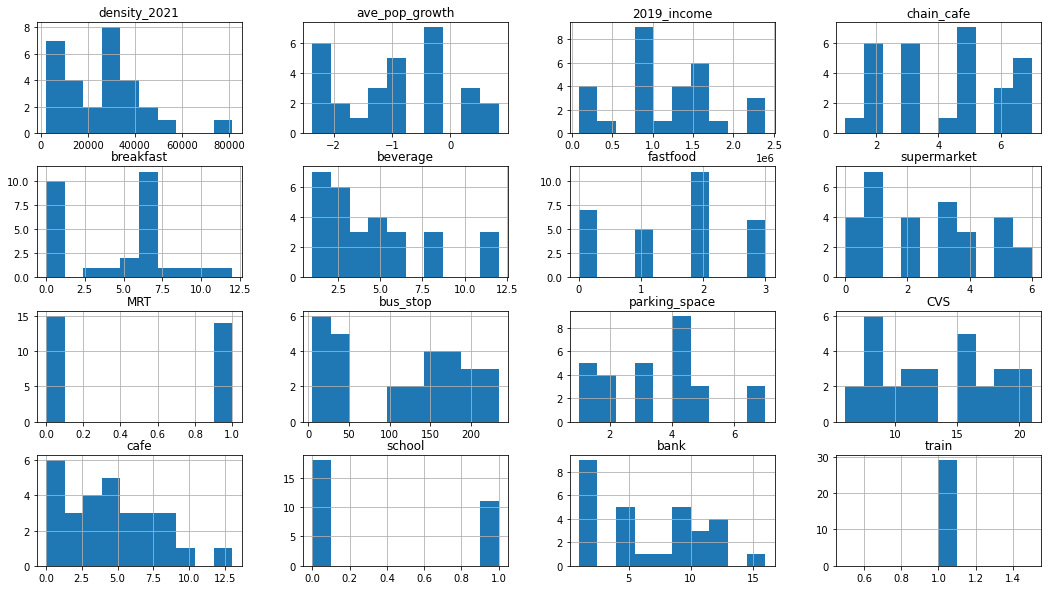

In [46]:
dfz_1.hist(figsize=(18, 10));

# 大部分人口密度(27650.06)
# 人口大多緩步負成長(-0.8008798)
# 年收均值(1189988)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(6)
# 飲料店(4)
# 速食餐廳(2)
# 超市(2)
# 捷運(0)
# 停車場(4)
# CVS(13)
# cafe(4)
# school(0)
# 銀行(6)
# 火車站(1)
# 巴士站至少(133)站

In [47]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
34,cama,台北市南港區南港路二段6號,25.054352,121.605988,18109.993504,5.352986,2265416,7,1.0,2.0,...,1.0,53.0,1.0,8.0,4.0,1.0,4.0,1.0,台北市南港,2
72,cama,新北市汐止區新台五路一段99號B1,25.061620,121.648248,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,86.0,1.0,7.0,1.0,0.0,6.0,1.0,新北市汐止,2
331,louisa,新北市汐止區新北市汐止區新台五路一段75號B1,25.061182,121.645750,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,75.0,1.0,8.0,1.0,0.0,4.0,1.0,新北市汐止,2
558,stbks,新北市汐止區新台五路一段94號1樓,25.060718,121.648416,9609.839147,2.511079,1450740,4,0.0,1.0,...,0.0,76.0,1.0,7.0,1.0,0.0,5.0,1.0,新北市汐止,2
559,stbks,新北市汐止區新台五路一段99號,25.061620,121.648248,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,86.0,1.0,7.0,1.0,0.0,6.0,1.0,新北市汐止,2


In [48]:
dfz_2=feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']
dfz_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.0
mean,28986.469124,1.718247,2.608038e+06,4.600000,0.200000,1.200000,1.200000,0.400000,0.200000,75.200000,1.0,7.400000,1.600000,0.200000,5.0,1.0
std,14131.834429,2.256899,7.427399e+05,1.341641,0.447214,0.447214,0.447214,0.547723,0.447214,13.479614,0.0,0.547723,1.341641,0.447214,1.0,0.0
min,9609.839147,0.242390,1.450740e+06,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,53.000000,1.0,7.000000,1.000000,0.000000,4.0,1.0
25%,18109.993504,0.242390,2.265416e+06,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,75.000000,1.0,7.000000,1.000000,0.000000,4.0,1.0
50%,39070.837657,0.242390,3.108012e+06,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,76.000000,1.0,7.000000,1.000000,0.000000,5.0,1.0
75%,39070.837657,2.511079,3.108012e+06,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,86.000000,1.0,8.000000,1.000000,0.000000,6.0,1.0
max,39070.837657,5.352986,3.108012e+06,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,86.000000,1.0,8.000000,4.000000,1.000000,6.0,1.0


In [49]:
dfz_2.median()

density_2021      3.907084e+04
ave_pop_growth    2.423895e-01
2019_income       3.108012e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          7.600000e+01
parking_space     1.000000e+00
CVS               7.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              5.000000e+00
train             1.000000e+00
dtype: float64

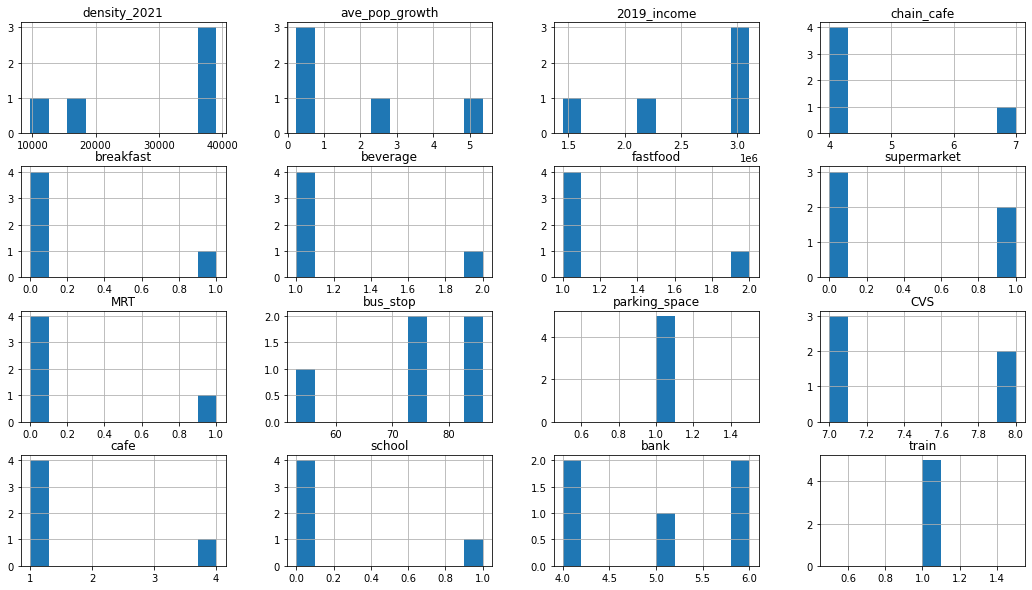

In [50]:
dfz_2.hist(figsize=(18, 10));

# 大部分人口密度(15641.54)
# 人口大多緩步負成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 早餐店(4)
# 飲料店(6)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(5)
# cafe(2)
# school(1)
# 銀行(3)
# 火車站(0)
# 巴士站至少(143)站

In [51]:
dfz_3=feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']
dfz_3.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,1.100000e+01,1.100000e+01,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,5.734297e+03,5.857702e-01,1631191.0,16.727273,1.272727,9.454545,15.636364,0.181818,2.454545,130.000000,2.727273,43.363636,21.000000,0.272727,41.545455,1.0
std,1.907772e-12,1.164412e-16,0.0,1.103713,0.467099,1.128152,1.026911,0.603023,0.522233,39.263214,1.420627,4.031693,5.567764,0.467099,9.374045,0.0
min,5.734297e+03,5.857702e-01,1631191.0,15.000000,1.000000,7.000000,14.000000,0.000000,2.000000,75.000000,1.000000,38.000000,12.000000,0.000000,24.000000,1.0
25%,5.734297e+03,5.857702e-01,1631191.0,16.000000,1.000000,9.000000,15.000000,0.000000,2.000000,111.000000,2.000000,40.500000,18.000000,0.000000,39.000000,1.0
50%,5.734297e+03,5.857702e-01,1631191.0,17.000000,1.000000,10.000000,15.000000,0.000000,2.000000,114.000000,2.000000,44.000000,21.000000,0.000000,41.000000,1.0
75%,5.734297e+03,5.857702e-01,1631191.0,17.500000,1.500000,10.000000,16.500000,0.000000,3.000000,141.500000,3.500000,45.500000,25.500000,0.500000,45.500000,1.0
max,5.734297e+03,5.857702e-01,1631191.0,18.000000,2.000000,11.000000,17.000000,2.000000,3.000000,208.000000,5.000000,50.000000,28.000000,1.000000,56.000000,1.0


In [52]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
117,louisa,台北市中正區信陽街5號之2,25.044699,121.516700,5734.296784,0.58577,1631191,17,1.0,8.0,...,3.0,144.0,2.0,42.0,13.0,1.0,41.0,1.0,台北市中正,3
121,louisa,台北市中正區忠孝西路一段38號B1-B櫃,25.046215,121.516436,5734.296784,0.58577,1631191,17,1.0,10.0,...,2.0,114.0,3.0,45.0,20.0,0.0,40.0,1.0,台北市中正,3
125,louisa,台北市中正區忠孝西路一段50號1樓,25.046303,121.515823,5734.296784,0.58577,1631191,18,1.0,11.0,...,2.0,126.0,2.0,46.0,22.0,0.0,46.0,1.0,台北市中正,3
371,stbks,台北市中正區忠孝西路一段49號B1,25.047066,121.517670,5734.296784,0.58577,1631191,15,1.0,10.0,...,2.0,75.0,5.0,38.0,27.0,0.0,30.0,1.0,台北市中正,3
373,stbks,台北市中正區南陽街1號2F,25.045715,121.516229,5734.296784,0.58577,1631191,18,1.0,9.0,...,3.0,139.0,2.0,44.0,17.0,0.0,41.0,1.0,台北市中正,3
374,stbks,"台北市中正區懷寧街10號1,2,3樓(懷寧街與開封街口)",25.046187,121.514221,5734.296784,0.58577,1631191,18,2.0,9.0,...,2.0,208.0,1.0,50.0,28.0,1.0,55.0,1.0,台北市中正,3
378,stbks,台北市中正區青島西路7號一樓,25.044913,121.518182,5734.296784,0.58577,1631191,16,1.0,7.0,...,3.0,112.0,3.0,38.0,12.0,0.0,24.0,1.0,台北市中正,3
379,stbks,台北市中正區鄭州路8號B1,25.048788,121.514536,5734.296784,0.58577,1631191,15,2.0,10.0,...,3.0,110.0,2.0,40.0,28.0,0.0,45.0,1.0,台北市中正,3
380,stbks,台北市中正區北平西路3號2樓,25.047176,121.517058,5734.296784,0.58577,1631191,16,1.0,10.0,...,2.0,98.0,5.0,41.0,24.0,0.0,38.0,1.0,台北市中正,3
382,stbks,台北市中正區館前路26號1樓,25.044879,121.514906,5734.296784,0.58577,1631191,17,2.0,10.0,...,3.0,191.0,1.0,49.0,19.0,1.0,56.0,1.0,台北市中正,3


In [53]:
dfz_3.median()

density_2021      5.734297e+03
ave_pop_growth    5.857702e-01
2019_income       1.631191e+06
chain_cafe        1.700000e+01
breakfast         1.000000e+00
beverage          1.000000e+01
fastfood          1.500000e+01
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          1.140000e+02
parking_space     2.000000e+00
CVS               4.400000e+01
cafe              2.100000e+01
school            0.000000e+00
bank              4.100000e+01
train             1.000000e+00
dtype: float64

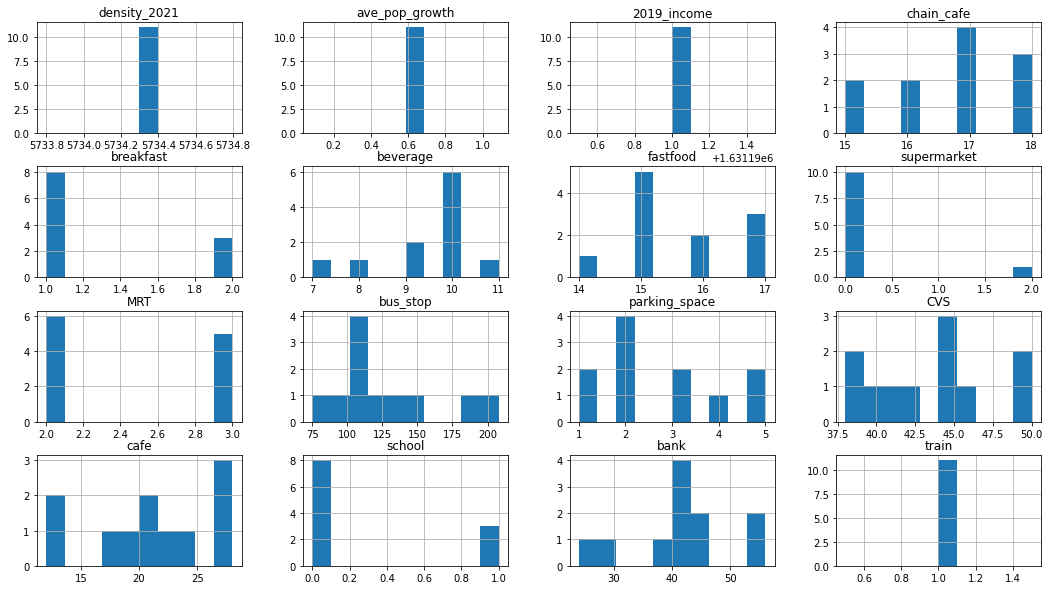

In [54]:
dfz_3.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口大多緩步負成長(0.5857702)
# 年收均值(1631191)
# 平均有(17)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(10)
# 速食餐廳(15)
# 超市(0)
# 捷運(2)
# 停車場(2)
# CVS(44)
# cafe(21)
# school(0)
# 銀行(41)
# 火車站(1)
# 巴士站至少(114)站

In [55]:
dfz_4=feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']
dfz_4.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.0
mean,21081.051542,0.358781,3.172528e+06,9.111111,3.444444,4.333333,2.555556,0.555556,1.0,390.444444,12.888889,21.333333,19.555556,0.0,19.222222,1.0
std,2165.521394,0.248694,4.627910e+05,0.333333,0.881917,1.322876,1.130388,0.527046,0.0,43.327564,1.364225,1.000000,5.077182,0.0,1.855921,0.0
min,20359.211077,-0.304404,3.018264e+06,9.000000,3.000000,2.000000,2.000000,0.000000,1.0,317.000000,11.000000,20.000000,11.000000,0.0,17.000000,1.0
25%,20359.211077,0.441679,3.018264e+06,9.000000,3.000000,5.000000,2.000000,0.000000,1.0,381.000000,12.000000,21.000000,19.000000,0.0,19.000000,1.0
50%,20359.211077,0.441679,3.018264e+06,9.000000,3.000000,5.000000,2.000000,1.000000,1.0,418.000000,14.000000,21.000000,23.000000,0.0,19.000000,1.0
75%,20359.211077,0.441679,3.018264e+06,9.000000,3.000000,5.000000,2.000000,1.000000,1.0,418.000000,14.000000,21.000000,23.000000,0.0,19.000000,1.0
max,26855.775259,0.441679,4.406637e+06,10.000000,5.000000,5.000000,5.000000,1.000000,1.0,418.000000,14.000000,23.000000,23.000000,0.0,23.000000,1.0


In [56]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
293,louisa,新北市板橋區縣民大道二段7號B1,25.014330,121.463635,20359.211077,0.441679,3018264,9,3.0,5.0,...,1.0,418.0,14.0,21.0,23.0,0.0,19.0,1.0,新北市板橋,4
298,louisa,新北市板橋區新民街43號1樓,25.010778,121.463896,20359.211077,0.441679,3018264,10,5.0,5.0,...,1.0,409.0,11.0,20.0,19.0,0.0,23.0,1.0,新北市板橋,4
523,stbks,新北市板橋區中山路一段152號2F,25.011113,121.464344,26855.775259,-0.304404,4406637,9,5.0,5.0,...,1.0,381.0,11.0,21.0,20.0,0.0,21.0,1.0,新北市板橋,4
531,stbks,新北市板橋區新站路28號2樓,25.013622,121.466627,20359.211077,0.441679,3018264,9,3.0,2.0,...,1.0,317.0,12.0,23.0,11.0,0.0,17.0,1.0,新北市板橋,4
532,stbks,新北市板橋區新站路28號9樓,25.013622,121.466627,20359.211077,0.441679,3018264,9,3.0,2.0,...,1.0,317.0,12.0,23.0,11.0,0.0,17.0,1.0,新北市板橋,4
533,stbks,新北市板橋區縣民大道二段7號1F,25.014330,121.463635,20359.211077,0.441679,3018264,9,3.0,5.0,...,1.0,418.0,14.0,21.0,23.0,0.0,19.0,1.0,新北市板橋,4
534,stbks,新北市板橋區縣民大道二段7號B1,25.014330,121.463635,20359.211077,0.441679,3018264,9,3.0,5.0,...,1.0,418.0,14.0,21.0,23.0,0.0,19.0,1.0,新北市板橋,4
535,stbks,新北市板橋區縣民大道二段7號B1 (捷運3A出口),25.014330,121.463635,20359.211077,0.441679,3018264,9,3.0,5.0,...,1.0,418.0,14.0,21.0,23.0,0.0,19.0,1.0,新北市板橋,4
536,stbks,新北市板橋區縣民大道二段7號B1(近台鐵及高鐵入口處),25.014330,121.463635,20359.211077,0.441679,3018264,9,3.0,5.0,...,1.0,418.0,14.0,21.0,23.0,0.0,19.0,1.0,新北市板橋,4


In [57]:
dfz_4.median()

density_2021      2.035921e+04
ave_pop_growth    4.416789e-01
2019_income       3.018264e+06
chain_cafe        9.000000e+00
breakfast         3.000000e+00
beverage          5.000000e+00
fastfood          2.000000e+00
supermarket       1.000000e+00
MRT               1.000000e+00
bus_stop          4.180000e+02
parking_space     1.400000e+01
CVS               2.100000e+01
cafe              2.300000e+01
school            0.000000e+00
bank              1.900000e+01
train             1.000000e+00
dtype: float64

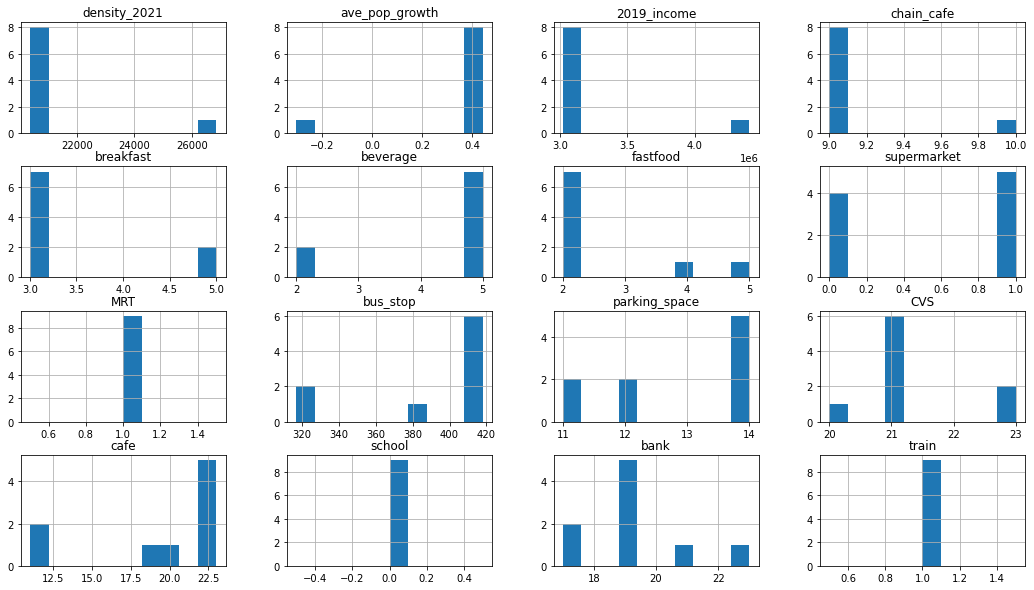

In [58]:
dfz_4.hist(figsize=(18, 10));

# 大部分人口密度(20359.21)
# 人口大多緩步負成長(0.4416789)
# 年收均值(3018264)
# 平均有(9)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(5)
# 速食餐廳(2)
# 超市(1)
# 捷運(1)
# 停車場(14)
# CVS(21)
# cafe(23)
# school(0)
# 銀行(19)
# 火車站(1)
# 巴士站至少(418)站

In [59]:
dfz_5=feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
dfz_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.00000,10.000000,10.000000,10.0,10.00000,10.0
mean,7761.552546,9.071561,1.031631e+07,2.800000,2.100000,0.900000,0.400000,1.500000,0.0,397.200000,5.90000,8.800000,2.300000,0.0,2.90000,0.0
std,1303.348025,2.074394,4.226767e+05,1.316561,0.875595,1.100505,0.516398,1.433721,0.0,60.332044,4.72464,1.932184,0.674949,0.0,1.66333,0.0
min,6952.096520,6.065478,9.703793e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,233.000000,0.00000,4.000000,1.000000,0.0,1.00000,0.0
25%,6952.096520,7.139079,9.922549e+06,1.500000,2.000000,0.000000,0.000000,0.000000,0.0,400.250000,2.50000,9.000000,2.000000,0.0,1.25000,0.0
50%,6952.096520,10.359882,1.057882e+07,3.000000,2.000000,0.500000,0.000000,2.000000,0.0,408.000000,4.00000,9.000000,2.000000,0.0,3.00000,0.0
75%,8975.736585,10.359882,1.057882e+07,4.000000,2.000000,1.750000,1.000000,2.000000,0.0,415.000000,10.00000,9.000000,3.000000,0.0,4.00000,0.0
max,9650.283273,10.359882,1.057882e+07,4.000000,4.000000,3.000000,1.000000,4.000000,0.0,455.000000,14.00000,11.000000,3.000000,0.0,5.00000,0.0


In [60]:
feature_o[feature_o['labels'] == 5]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
306,louisa,新北市林口區文化三路一段2號4樓,25.066147,121.361399,6952.096520,10.359882,10578817,1,1.0,1.0,...,0.0,233.0,1.0,4.0,1.0,0.0,2.0,0.0,新北市林口,5
307,louisa,新北市林口區忠孝一路12號,25.073093,121.364383,6952.096520,10.359882,10578817,4,2.0,1.0,...,0.0,412.0,2.0,8.0,3.0,0.0,4.0,0.0,新北市林口,5
308,louisa,新北市林口區仁愛路二段249號,25.076851,121.374191,6952.096520,10.359882,10578817,3,3.0,0.0,...,0.0,415.0,10.0,11.0,2.0,0.0,1.0,0.0,新北市林口,5
310,louisa,新北市林口區信義路162號1樓,25.080204,121.379212,9650.283273,6.065478,9703793,1,4.0,0.0,...,0.0,436.0,0.0,9.0,3.0,0.0,2.0,0.0,新北市林口,5
312,louisa,新北市林口區文化三路一段460號,25.075001,121.369288,6952.096520,10.359882,10578817,1,1.0,0.0,...,0.0,455.0,14.0,11.0,2.0,0.0,5.0,0.0,新北市林口,5
541,stbks,新北市林口區文化三路一段356號,25.071241,121.363547,6952.096520,10.359882,10578817,4,2.0,3.0,...,0.0,415.0,4.0,9.0,2.0,0.0,5.0,0.0,新北市林口,5
542,stbks,新北市林口區文化三路一段359 號,25.072814,121.364907,6952.096520,10.359882,10578817,4,2.0,2.0,...,0.0,399.0,4.0,9.0,3.0,0.0,4.0,0.0,新北市林口,5
543,stbks,新北市林口區文化三路一段359號,25.072814,121.364907,6952.096520,10.359882,10578817,4,2.0,2.0,...,0.0,399.0,4.0,9.0,3.0,0.0,4.0,0.0,新北市林口,5
544,stbks,新北市林口區文化二路一段551號,25.077230,121.374582,9650.283273,6.065478,9703793,3,2.0,0.0,...,0.0,404.0,10.0,9.0,2.0,0.0,1.0,0.0,新北市林口,5
545,stbks,新北市林口區文化二路一段551號(家樂福隔壁),25.077230,121.374582,9650.283273,6.065478,9703793,3,2.0,0.0,...,0.0,404.0,10.0,9.0,2.0,0.0,1.0,0.0,新北市林口,5


In [61]:
dfz_5.median()

density_2021      6.952097e+03
ave_pop_growth    1.035988e+01
2019_income       1.057882e+07
chain_cafe        3.000000e+00
breakfast         2.000000e+00
beverage          5.000000e-01
fastfood          0.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          4.080000e+02
parking_space     4.000000e+00
CVS               9.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

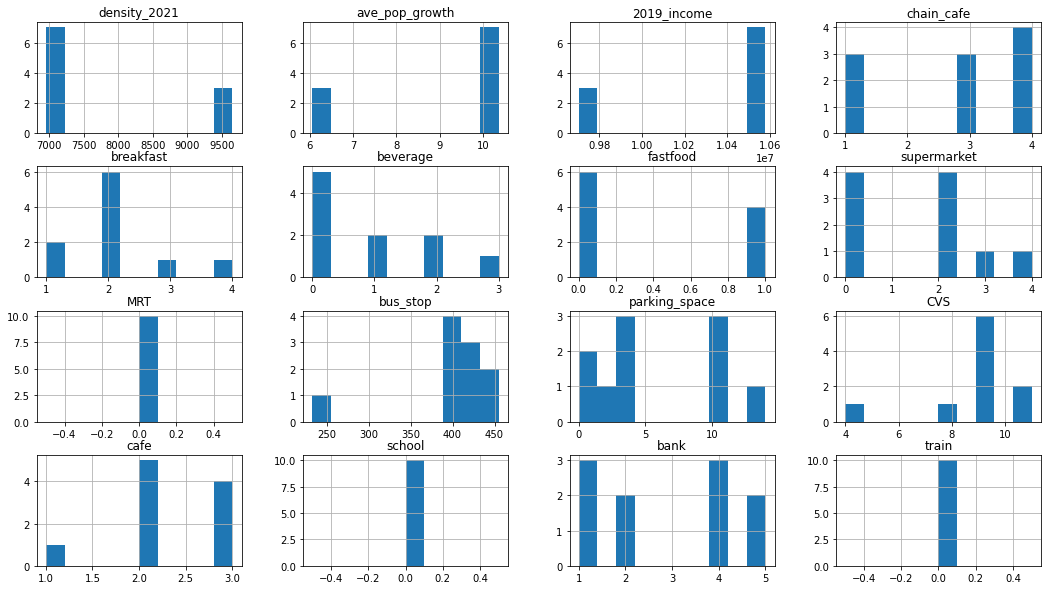

In [62]:
dfz_5.hist(figsize=(18, 10));

# 大部分人口密度(6952.097)
# 人口大多緩步負成長(0.1035988)
# 年收均值(10578820)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(5)
# 速食餐廳(0)
# 超市(2)
# 捷運(0)
# 停車場(4)
# CVS(9)
# cafe(2)
# school(0)
# 銀行(3)
# 火車站(1)
# 巴士站至少(408)站